In [4]:
from sklearn import preprocessing

def encode_text_index(df,name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

def encode_numeric_zscore(df,name,mean=None,sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name]-mean)/sd
    
def to_xy(df,target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)

    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    
    if target_type in (np.int64, np.int32):
        return df.as_matrix(result).astype(np.float32),df.as_matrix([target]).astype(np.int32)
    else:
        return df.as_matrix(result).astype(np.float32),df.as_matrix([target]).astype(np.float32)

In [5]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.contrib.learn as learn
from sklearn import metrics
import time
#tf.logging.set_verbosity(tf.logging.ERROR)
start= time.time()
path = "/home/beshah/Desktop/CSCI835/data"

filename_read = os.path.join(path,"wine.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

encode_numeric_zscore(df,'alcohol')
encode_numeric_zscore(df,'malic_acid')
encode_numeric_zscore(df,'ash')
encode_numeric_zscore(df,'alcalinity_ash')
encode_numeric_zscore(df,'magnesium')
encode_numeric_zscore(df,'total_phenols')
encode_numeric_zscore(df,'flavanoids')
encode_numeric_zscore(df,'nonflavanoid_phenols')
encode_numeric_zscore(df,'proanthocyanins')
encode_numeric_zscore(df,'color_intensity')
encode_numeric_zscore(df,'hue')
encode_numeric_zscore(df,'od28_od315')
encode_numeric_zscore(df,'proline')
classes = encode_text_index(df,'classes')
num_classes = len(classes)

x,y = to_xy(df,'classes')

model_dir = 'tmp/wine' 
#global_step = tf.Variable(1000, name='global_step',trainable=False)
#opt=tf.train.RMSPropOptimizer(learning_rate=0.0001,  decay=0.9, momentum=0.0, epsilon=1e-10)
#opt= tf.train.AdagradDAOptimizer(learning_rate=0.1, global_step=global_step, initial_gradient_squared_accumulator_value=0.1, l1_regularization_strength=0.0,l2_regularization_strength=0.0)
#opt = tf.initialize_all_variables()
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x.shape[0])]
classifier = learn.DNNClassifier(
    #optimizer=opt,
    model_dir= model_dir,
    hidden_units=[40, 80, 20], n_classes=num_classes, feature_columns=feature_columns)

classifier.fit(x, y, steps=1000)

pred = list(classifier.predict(x, as_iterable=True))
score = metrics.accuracy_score(y, pred)
print("Final score: {}".format(score))
running_time= time.time()- start
print("Excution time= ", running_time,"secs")

pred = list(classifier.predict(x, as_iterable=True))
predDF = pd.DataFrame(pred)
pred_nameDF = pd.DataFrame(classes[pred])
actual_nameDF = pd.DataFrame(classes[df['classes']])

df2 = pd.concat([df,predDF,pred_nameDF,actual_nameDF],axis=1)
df2.columns = ['alcohol','malic_acid','ash','alcalinity_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od28_od315','proline','expected','predicted','expected_str','predicted_str']

df2

Final score: 1.0
Excution time=  3.8375167846679688 secs


,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od28_od315,proline,expected,predicted,expected_str,predicted_str
0,0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,0,1,1
1,0,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,0,1,1
2,0,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,0,1,1
3,0,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,0,1,1
4,0,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,0,1,1
5,0,1.477387,-0.515911,0.304301,-1.286079,0.858284,1.557699,1.362285,-0.175599,0.662349,0.729811,0.404908,0.335659,2.232741,0,1,1
6,0,1.711427,-0.417446,0.304301,-1.465743,-0.261969,0.327374,0.491291,-0.497005,0.679820,0.082781,0.273659,1.363842,1.724655,0,1,1
7,0,1.304936,-0.166807,0.887510,-0.567423,1.488427,0.487157,0.481280,-0.416654,-0.595603,-0.003490,0.448658,1.363842,1.740533,0,1,1
8,0,2.253415,-0.623328,-0.716315,-1.645408,-0.191954,0.806722,0.951817,-0.577356,0.679820,0.061213,0.536158,0.335659,0.946649,0,1,1
9,0,1.058578,-0.882918,-0.351810,-1.046527,-0.121938,1.094330,1.122011,-1.139816,0.452690,0.932547,0.229909,1.321588,0.946649,0,1,1


In [7]:
tf.logging.set_verbosity(tf.logging.ERROR)

sample_wine = np.array( [[14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
]], dtype=float)
pred = list(classifier.predict(sample_wine, as_iterable=True))
print("Ad hoc prediction - Predict that {} is: {}".format(sample_wine,classes[pred]))

sample_wine = np.array( [[14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
],[13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050]], dtype=float)
pred = list(classifier.predict(sample_wine, as_iterable=True))
print("Two sample flower predictions - Predict that {} is: {}".format(sample_wine,classes[pred]))

Ad hoc prediction - Predict that [[  1.42300000e+01   1.71000000e+00   2.43000000e+00   1.56000000e+01
    1.27000000e+02   2.80000000e+00   3.06000000e+00   2.80000000e-01
    2.29000000e+00   5.64000000e+00   1.04000000e+00   3.92000000e+00
    1.06500000e+03]] is: [1]
Two sample flower predictions - Predict that [[  1.42300000e+01   1.71000000e+00   2.43000000e+00   1.56000000e+01
    1.27000000e+02   2.80000000e+00   3.06000000e+00   2.80000000e-01
    2.29000000e+00   5.64000000e+00   1.04000000e+00   3.92000000e+00
    1.06500000e+03]
 [  1.32000000e+01   1.78000000e+00   2.14000000e+00   1.12000000e+01
    1.00000000e+02   2.65000000e+00   2.76000000e+00   2.60000000e-01
    1.28000000e+00   4.38000000e+00   1.05000000e+00   3.40000000e+00
    1.05000000e+03]] is: [1 1]


In [9]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.contrib.learn as learn
import numpy as np
from tensorflow.contrib.learn.python.learn.metric_spec import MetricSpec

tf.logging.set_verbosity(tf.logging.ERROR)
    
filename_read = os.path.join(path,"wine.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])
encode_numeric_zscore(df,'alcohol')
encode_numeric_zscore(df,'malic_acid')
encode_numeric_zscore(df,'ash')
encode_numeric_zscore(df,'alcalinity_ash')
encode_numeric_zscore(df,'magnesium')
encode_numeric_zscore(df,'total_phenols')
encode_numeric_zscore(df,'flavanoids')
encode_numeric_zscore(df,'nonflavanoid_phenols')
encode_numeric_zscore(df,'proanthocyanins')
encode_numeric_zscore(df,'color_intensity')
encode_numeric_zscore(df,'hue')
encode_numeric_zscore(df,'od28_od315')
encode_numeric_zscore(df,'proline')
classes = encode_text_index(df,'classes')
num_classes = len(classes)


x, y = to_xy(df,'classes')
    
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=45)

model_dir = 'tmp/wine' 

feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x.shape[0])]
#opt=tf.train.RMSPropOptimizer(learning_rate=0.0001,  decay=0.9, momentum=0.0, epsilon=1e-10)
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x.shape[0])]
classifier = learn.DNNClassifier(
   # optimizer=opt,
    model_dir= model_dir,
    hidden_units=[40, 80, 20], n_classes=num_classes, feature_columns=feature_columns)

validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
    x_test,
    y_test,
    every_n_steps=500,
    early_stopping_metric="loss",
    early_stopping_metric_minimize=True,
    early_stopping_rounds=50)
    
classifier.fit(x_train, y_train,monitors=[validation_monitor],steps=10000)
    
pred = list(classifier.predict(x_test, as_iterable=True))
score = metrics.accuracy_score(y_test, pred)
print("Accuarcy before save: {}".format(score))

Accuarcy before save: 1.0


In [11]:
import tensorflow as tf
import tensorflow.contrib.learn as learn
from sklearn import metrics
import pandas as pd
import os
from sklearn import preprocessing

tf.logging.set_verbosity(tf.logging.ERROR)

path = "/home/beshah/Desktop/CSCI835/data"

filename_read = os.path.join(path,"wine.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])
encode_numeric_zscore(df,'alcohol')
encode_numeric_zscore(df,'malic_acid')
encode_numeric_zscore(df,'ash')
encode_numeric_zscore(df,'alcalinity_ash')
encode_numeric_zscore(df,'magnesium')
encode_numeric_zscore(df,'total_phenols')
encode_numeric_zscore(df,'flavanoids')
encode_numeric_zscore(df,'nonflavanoid_phenols')
encode_numeric_zscore(df,'proanthocyanins')
encode_numeric_zscore(df,'color_intensity')
encode_numeric_zscore(df,'hue')
encode_numeric_zscore(df,'od28_od315')
encode_numeric_zscore(df,'proline')
classes = encode_text_index(df,'classes')
num_classes = len(classes)

x,y = to_xy(df,'classes')

model_dir = 'tmp/wine' 
#opt=tf.train.RMSPropOptimizer(learning_rate=0.0001,  decay=0.9, momentum=0.0, epsilon=1e-10)
#init_opt = tf.initialize_all_variables()
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x.shape[0])]
classifier = learn.DNNClassifier(
    #optimizer=opt,
    model_dir= model_dir,
    hidden_units=[40, 80, 20], n_classes=num_classes, feature_columns=feature_columns)

classifier.fit(x, y, steps=1000)

pred = list(classifier.predict(x, as_iterable=True))
score = metrics.accuracy_score(y, pred)
print("Accuarcy before save: {}".format(score))



Accuarcy before save: 1.0


In [12]:
from IPython.display import display

tf.logging.set_verbosity(tf.logging.ERROR)

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

pred = list(classifier.predict_proba(x_test, as_iterable=True))

print("As percent probability")
print(pred[0]*100)

print("Numpy array of predictions")
display(pred[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

As percent probability
[  0.   0. 100.]
Numpy array of predictions


[array([ 0.,  0.,  1.], dtype=float32),
 array([ 0.,  0.,  1.], dtype=float32),
 array([ 1.,  0.,  0.], dtype=float32),
 array([ 0.,  1.,  0.], dtype=float32),
 array([ 0.,  1.,  0.], dtype=float32)]

Log loss score: 7.242429105297611e-05


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[12  0  0]
 [ 0 17  0]
 [ 0  0 16]]


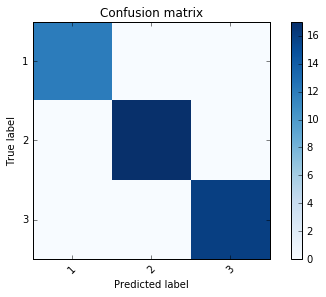

In [14]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.contrib.learn as learn
import numpy as np
from tensorflow.contrib.learn.python.learn.metric_spec import MetricSpec
from sklearn.metrics import confusion_matrix

tf.logging.set_verbosity(tf.logging.ERROR)

path = "/home/beshah/Desktop/CSCI835/data"
    
filename_read = os.path.join(path,"wine.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])
encode_numeric_zscore(df,'alcohol')
encode_numeric_zscore(df,'malic_acid')
encode_numeric_zscore(df,'ash')
encode_numeric_zscore(df,'alcalinity_ash')
encode_numeric_zscore(df,'magnesium')
encode_numeric_zscore(df,'total_phenols')
encode_numeric_zscore(df,'flavanoids')
encode_numeric_zscore(df,'nonflavanoid_phenols')
encode_numeric_zscore(df,'proanthocyanins')
encode_numeric_zscore(df,'color_intensity')
encode_numeric_zscore(df,'hue')
encode_numeric_zscore(df,'od28_od315')
encode_numeric_zscore(df,'proline')
classes = encode_text_index(df,'classes')
num_classes = len(classes)


x, y = to_xy(df,'classes')
    
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=45)

model_dir = 'tmp/wine' 

feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x.shape[0])]
#opt=tf.train.RMSPropOptimizer(learning_rate=0.0001,  decay=0.9, momentum=0.0, epsilon=1e-10)
#init_opt = tf.initialize_all_variables()
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x.shape[0])]
classifier = learn.DNNClassifier(
   # optimizer=opt,
    model_dir= model_dir,
    hidden_units=[40, 80, 20], n_classes=num_classes, feature_columns=feature_columns)

validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
    x_test,
    y_test,
    every_n_steps=500,
    early_stopping_metric="loss",
    early_stopping_metric_minimize=True,
    early_stopping_rounds=50)
    
classifier.fit(x_train, y_train,monitors=[validation_monitor],steps=10000)
    
pred = list(classifier.predict(x_test, as_iterable=True))
cm = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, classes)
plt.show()


In [15]:
import tensorflow.contrib.learn as learn
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.model_selection import KFold

tf.logging.set_verbosity(tf.logging.ERROR)

path = "/home/beshah/Desktop/CSCI835/data"
    
filename_read = os.path.join(path,"wine.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])
encode_numeric_zscore(df,'alcohol')
encode_numeric_zscore(df,'malic_acid')
encode_numeric_zscore(df,'ash')
encode_numeric_zscore(df,'alcalinity_ash')
encode_numeric_zscore(df,'magnesium')
encode_numeric_zscore(df,'total_phenols')
encode_numeric_zscore(df,'flavanoids')
encode_numeric_zscore(df,'nonflavanoid_phenols')
encode_numeric_zscore(df,'proanthocyanins')
encode_numeric_zscore(df,'color_intensity')
encode_numeric_zscore(df,'hue')
encode_numeric_zscore(df,'od28_od315')
encode_numeric_zscore(df,'proline')
classes = encode_text_index(df,'classes')
num_classes = len(classes)
np.random.seed(42)
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
x,y = to_xy(df,'classes')

kf = KFold(5)
    
all_y_test = []
all_y_pred = []
fold = 0
for train, test in kf.split(x):        
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model_dir = 'tmp/wine' + str(fold)
    
    feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x.shape[0])]
    #opt=tf.train.RMSPropOptimizer(learning_rate=0.0001,  decay=0.9, momentum=0.0, epsilon=1e-10)
#init_opt = tf.initialize_all_variables()
    feature_columns = [tf.contrib.layers.real_valued_column("", dimension=x.shape[0])]
    classifier = learn.DNNClassifier(
    # optimizer=opt,
     model_dir= model_dir,
     hidden_units=[40, 80, 20], n_classes=num_classes, feature_columns=feature_columns)

    validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
        x_test,
        y_test,
        every_n_steps=50,
        early_stopping_metric="loss",
        early_stopping_metric_minimize=True,
        early_stopping_rounds=50)
    
    classifier.fit(x, y, steps=1000)

    pred = list(classifier.predict(x_test, as_iterable=True))
    
    all_y_test.append(y_test)
    all_y_pred.append(pred)        

    score = np.sqrt(metrics.accuracy_score(pred,y_test))
    print("Fold score (Accuracy): {}".format(score))


all_y_test = np.concatenate(all_y_test)
all_y_pred = np.concatenate(all_y_pred)
score = np.sqrt(metrics.accuracy_score(all_y_pred,all_y_test))
print()
print("Cross-validated score (Accuracy): {}".format(score))  

Fold #1
Fold score (Accuracy): 1.0
Fold #2
Fold score (Accuracy): 1.0
Fold #3
Fold score (Accuracy): 1.0
Fold #4
Fold score (Accuracy): 1.0
Fold #5
Fold score (Accuracy): 1.0

Cross-validated score (Accuracy): 1.0
